# Predicting House Prices in the Philippines

## Dataset:

"Housing Prices Dataset - Philippines" - Jandrik Luna

Source: https://www.kaggle.com/datasets/linkanjarad/housing-prices-dataset-philippines

## Import Libraries

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

## Set Global Variables

In [23]:
path1 = './dataset/Housing Prices Philippines Lamudi.csv'  # Original dataset
path2 = './dataset/Housing Prices Imputed.csv'             # Imputed dataset

selected_columns = [
    'Car Spaces',
    'Floor area (m²)',
    'Land Size (m²)',
    'Rooms (total)',
    'Price'
]

## Import dataset

In [24]:
dataset = pd.read_csv(path1)

dataset.tail()

,Unnamed: 0,Title,Bathrooms,Bedrooms,Car Spaces,Floor area (m²),Land Size (m²),Subdivision name,Block and Lot/Unit Number,Build (Year),Rooms (total),Price
2994,2994,"Price Reduced - 5 Bedroom,4 Bathroom Fully Fur...",4.0,5.0,NaN,372.00,300.0,Villas Magallanes,NaN,NaN,NaN,16000000.0
2995,2995,House Mediterranean Design Luxurious home For ...,4.0,4.0,6.0,350.00,1056.0,Ma. Luisa Estate Park,1,NaN,6.0,85000000.0
2996,2996,For Sale: 2-Bedroom Danessa Single Attached Ho...,1.0,2.0,1.0,37.30,169.0,Pineview,Phase 3 Block 13 Lot 20,NaN,NaN,2844000.0
2997,2997,For Sale RFO 4BR Single Detached House and Lot...,3.0,4.0,1.0,198.26,217.0,Bougainvillea Residences,Blk 8 Lot 1,NaN,4.0,7676915.0
2998,2998,House For Sale 3BR TH in Bloomfield Homes II-S...,1.0,3.0,NaN,86.00,72.0,Bloomfield Homes,Blk 2 Lot 3,NaN,NaN,2650000.0


## Keep Relevant Features

In [25]:
dataset = dataset[selected_columns]

dataset.tail()

,Car Spaces,Floor area (m²),Land Size (m²),Rooms (total),Price
2994,NaN,372.00,300.0,NaN,16000000.0
2995,6.0,350.00,1056.0,6.0,85000000.0
2996,1.0,37.30,169.0,NaN,2844000.0
2997,1.0,198.26,217.0,4.0,7676915.0
2998,NaN,86.00,72.0,NaN,2650000.0


## Inspect Dataset

In [26]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Car Spaces       1211 non-null   float64
 1   Floor area (m²)  2917 non-null   float64
 2   Land Size (m²)   2844 non-null   float64
 3   Rooms (total)    508 non-null    float64
 4   Price            2924 non-null   float64
dtypes: float64(5)
memory usage: 117.3 KB


In [27]:
dataset.dtypes

Car Spaces         float64
Floor area (m²)    float64
Land Size (m²)     float64
Rooms (total)      float64
Price              float64
dtype: object

In [28]:
dataset.shape

(2999, 5)

In [29]:
dataset.isna().sum()

Car Spaces         1788
Floor area (m²)      82
Land Size (m²)      155
Rooms (total)      2491
Price                75
dtype: int64

## Impute missing data

In [30]:
imputer = SimpleImputer(missing_values=np.nan, fill_value='mean')

dataset[:] = imputer.fit_transform(dataset[:])

dataset.tail()

,Car Spaces,Floor area (m²),Land Size (m²),Rooms (total),Price
2994,2.114781,372.00,300.0,4.224409,16000000.0
2995,6.000000,350.00,1056.0,6.000000,85000000.0
2996,1.000000,37.30,169.0,4.224409,2844000.0
2997,1.000000,198.26,217.0,4.000000,7676915.0
2998,2.114781,86.00,72.0,4.224409,2650000.0


## Recheck for missing data

In [31]:
dataset.isna().sum()

Car Spaces         0
Floor area (m²)    0
Land Size (m²)     0
Rooms (total)      0
Price              0
dtype: int64

## Split data into input and output

In [32]:
X = dataset.drop('Price', axis=1).values
y = dataset['Price'].values

## Split into training and test data

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Scale data

In [44]:
scaler = StandardScaler()

X_train[:, 2:4] = scaler.fit_transform(X_train[:, 2:4])
X_test[:, 2:4] = scaler.transform(X_test[:, 2:4])

X_train[2:4]

array([[ 1.00000000e+00,  6.50000000e+01, -9.12956556e-02,
        -1.34417229e+00],
       [ 2.11478117e+00,  1.53000000e+02, -1.08573229e-01,
        -7.07537387e-03]])

## Fit training data into LinearRegression model

In [35]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

## Predict Outcome from test data

In [36]:
y_pred = model.predict(X_test)

## Display model score

In [37]:
model.score(X_test, y_test)

0.3594691934846648

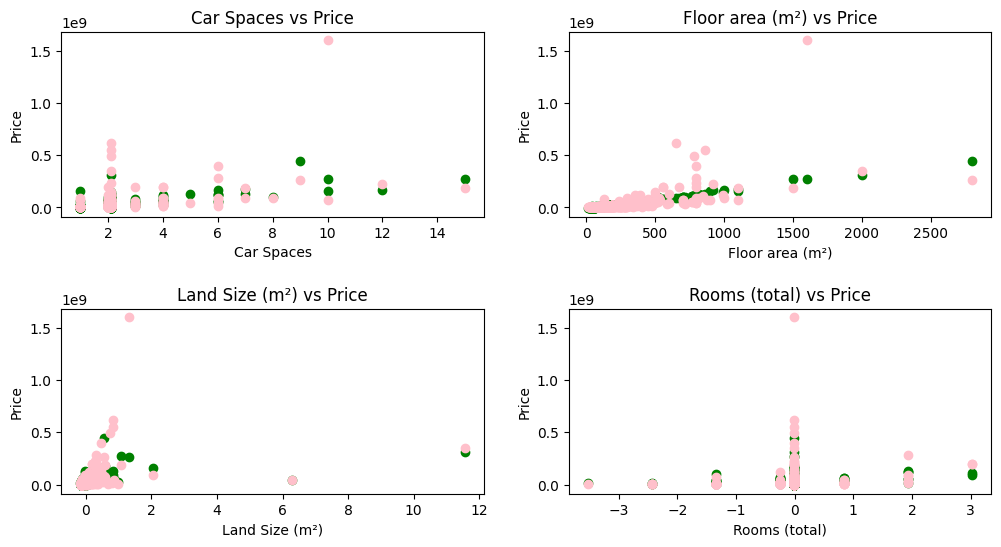

In [38]:
fig, ax = plt.subplots(math.ceil(len(selected_columns[:-1]) / 2), 2, figsize=(12, 6))

for i, col in enumerate(selected_columns[:-1]):
    r, c = divmod(i, 2)
    ax[r][c].set_title(col + ' vs Price')
    ax[r][c].set_xlabel(col)
    ax[r][c].set_ylabel('Price')
    ax[r][c].scatter(X_test[:,i], y_pred, c='green')
    ax[r][c].scatter(X_test[:,i], y_test, c='pink')

plt.subplots_adjust(hspace=0.5)
plt.show()